In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

<h2>Load Data</h2>

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']
cats = ['Geography', 'Gender']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.sample(5)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
930         931    15790782  Baryshnikov          661     Spain    Male   39   
1737       1738    15683677    Schiavone          769     Spain    Male   39   
1232       1233    15607537     Crawford          587   Germany    Male   46   
1042       1043    15593969   Abramovich          630     Spain  Female   39   
5887       5888    15691287         Ford          675   Germany  Female   33   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
930        6  132628.98              1          0               0   
1737       9       0.00              1          1               1   
1232       9  107850.82              1          1               0   
1042       7  135483.17              1          1               0   
5887       0  141816.25              1          1               0   

      EstimatedSalary  Exited  
930          38812.67       0  
1737         47722.79       0  
1232        139431.00       1  
1042        140881.20       1  
5887         64815.05       1

In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

<h2>Describe Nums and Cats</h2>

In [6]:
df[nums].describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [7]:
df[cats].describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

<h2>Value Counts Cats</h2>

In [8]:
for col in cats:
    print('Value dari kolom ' + col + ':')
    print(df[col].value_counts())
    print()

Value dari kolom Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Value dari kolom Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64



<h2>Check Duplicated Data</h2>

In [9]:
df.duplicated(subset = 'CustomerId').any()

False

<h2>Check Missing Values</h2>

In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h2>Handling Outliers</h2>

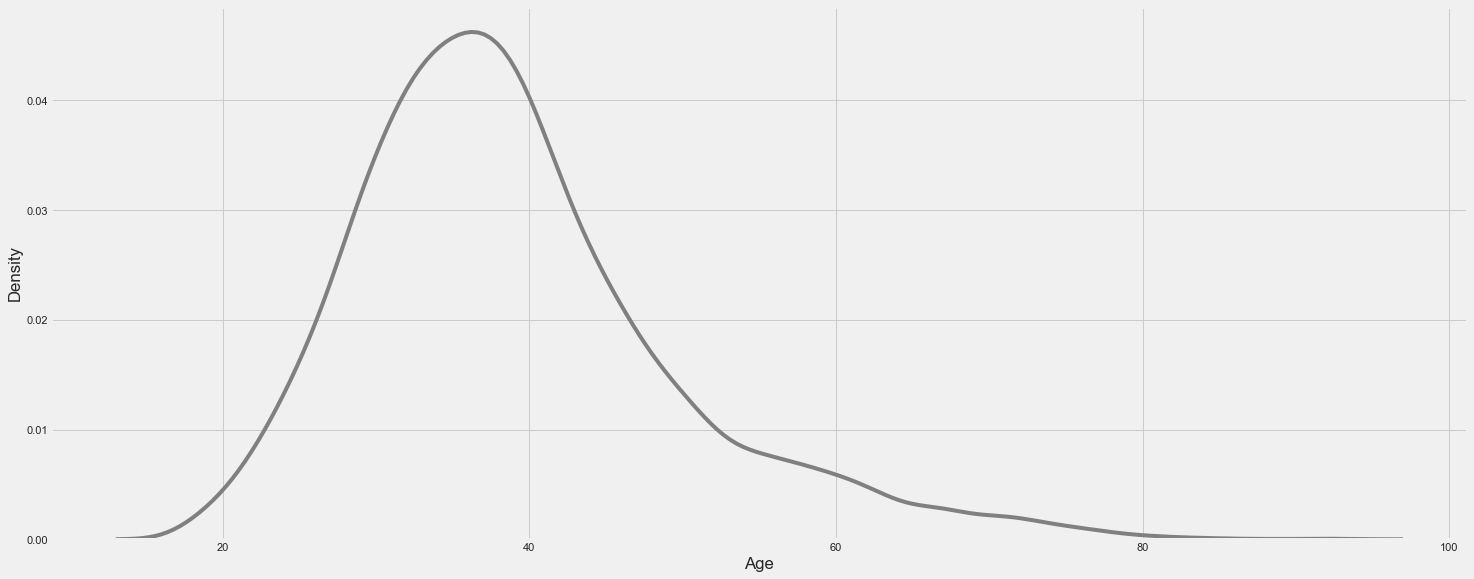

In [11]:
sns.kdeplot(x = 'Age', color = 'gray', data = df)
plt.tight_layout()
#iqr = Age, Balance
#zscore = CreditScore, Tenure, EstimatedSalary

In [12]:
#Using IQR
print('Jumlah baris sebelum memfilter outlier:', len(df))

filtered_entries = np.array([True] * len(df))
for col in ['Age', 'Balance']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print('Jumlah baris setelah memfilter outlier:', len(df))

#Using IQR

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9641


In [13]:
#Using Z-Score
print('Jumlah baris sebelum memfilter outlier:', len(df))

filtered_entries = np.array([True] * len(df))

for col in ['CreditScore', 'Tenure', 'EstimatedSalary']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print('Jumlah baris setelah memfilter outlier:', len(df))

#Using Z-score

Jumlah baris sebelum memfilter outlier: 9641
Jumlah baris setelah memfilter outlier: 9633


<h2>Normalization/Standardization</h2>

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<AxesSubplot:xlabel='Age', ylabel='Density'>

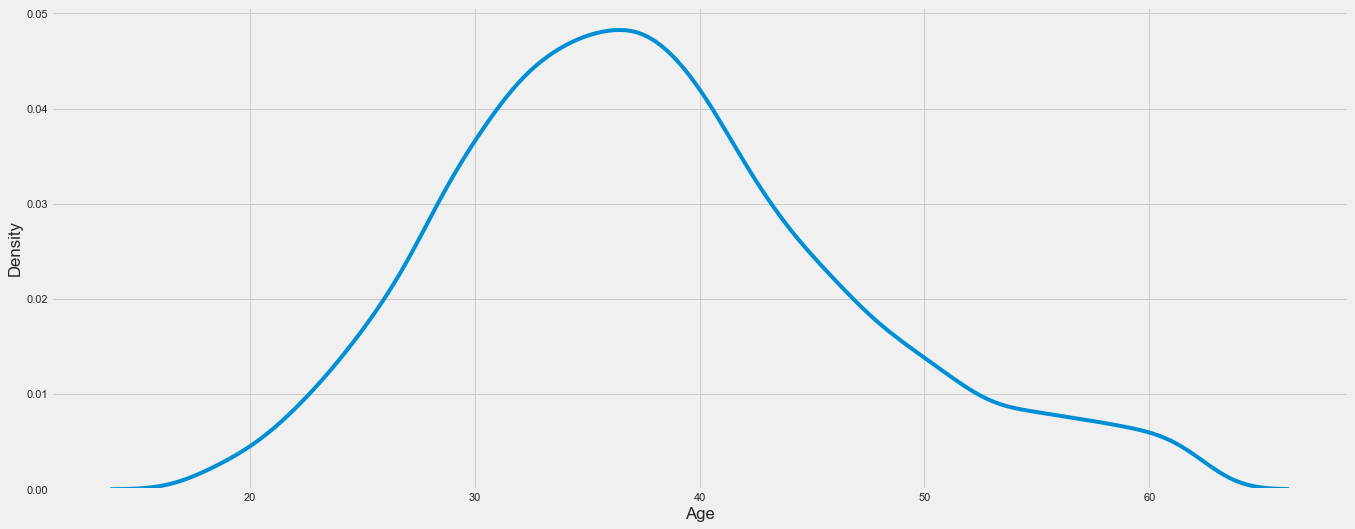

In [15]:
sns.kdeplot(df['Age'])

In [16]:
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['Balance_std'] = StandardScaler().fit_transform(df['Balance'].values.reshape(len(df), 1))
df['NumOfProducts_std'] = StandardScaler().fit_transform(df['NumOfProducts'].values.reshape(len(df), 1))
df['CreditScore_std'] = StandardScaler().fit_transform(df['CreditScore'].values.reshape(len(df), 1))
df['Tenure_std'] = StandardScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['EstimmatedSalary_std'] = StandardScaler().fit_transform(df['EstimatedSalary'].values.reshape(len(df), 1))

In [17]:
df.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count   9633.000000  9.633000e+03  9633.000000  9633.000000  9633.000000   
mean    4997.120419  1.569090e+07   650.535140    37.781896     5.016194   
std     2888.219790  7.185514e+04    96.349594     8.797656     2.888168   
min        1.000000  1.556570e+07   363.000000    18.000000     0.000000   
25%     2492.000000  1.562832e+07   584.000000    32.000000     3.000000   
50%     5003.000000  1.569100e+07   652.000000    37.000000     5.000000   
75%     7494.000000  1.575292e+07   717.000000    43.000000     7.000000   
max    10000.000000  1.581569e+07   850.000000    62.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    9633.000000    9633.000000  9633.000000     9633.000000   
mean    76540.277992       1.531091     0.705180        0.503270   
std     62398.895341       0.581496     0.455985        0.500015   
min         0.000000       1.000000     0.000000        0.000000   
25%         0.000000       1.000000     0.000000        0.000000   
50%     97268.100000       1.000000     1.000000        1.000000   
75%    127649.640000       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary       Exited       Age_std   Balance_std  \
count      9633.000000  9633.000000  9.633000e+03  9.633000e+03   
mean     100132.488295     0.203052  1.133850e-16 -4.277926e-16   
std       57514.668512     0.402292  1.000052e+00  1.000052e+00   
min          11.580000     0.000000 -2.248658e+00 -1.226692e+00   
25%       51099.560000     0.000000 -6.572428e-01 -1.226692e+00   
50%      100200.400000     0.000000 -8.888006e-02  3.321998e-01   
75%      149457.810000     0.000000  5.931552e-01  8.191173e-01   
max      199992.480000     1.000000  2.752933e+00  2.794390e+00   

       NumOfProducts_std  CreditScore_std    Tenure_std  EstimmatedSalary_std  
count       9.633000e+03     9.633000e+03  9.633000e+03          9.633000e+03  
mean       -2.161091e-16    -4.932788e-17  1.442379e-16         -1.705961e-16  
std         1.000052e+00     1.000052e+00  1.000052e+00          1.000052e+00  
min        -9.133663e-01    -2.984445e+00 -1.736898e+00         -1.740879e+00  
25%        -9.133663e-01    -6.905955e-01 -6.981238e-01         -8.525733e-01  
50%        -9.133663e-01     1.520439e-02 -5.607420e-03          1.180833e-03  
75%         8.064261e-01     6.898660e-01  6.869090e-01          8.576574e-01  
max         4.246011e+00     2.070328e+00  1.725684e+00          1.736343e+00

<h2>Feature Encoding</h2>

In [18]:
#One Hot Encoding (Geography)
onehots = pd.get_dummies(df['Geography'], prefix='Geography')
df = df.join(onehots)

In [19]:
df.sample(5)

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
8883       8884    15707696      Lu          471     Spain  Female   28   
1421       1422    15742378   Swaim          520   Germany    Male   32   
5395       5396    15639303   Moore          589   Germany    Male   48   
6639       6640    15583076  Deleon          588   Germany    Male   41   
1709       1710    15713843     Kao          850     Spain    Male   30   

      Tenure    Balance  NumOfProducts  ...  Exited   Age_std  Balance_std  \
8883       5       0.00              2  ...       0 -1.111933    -1.226692   
1421       5  110029.77              1  ...       0 -0.657243     0.536728   
5395       5  126111.61              1  ...       0  1.161518     0.794468   
6639       6  106116.56              2  ...       0  0.365810     0.474012   
1709       2       0.00              2  ...       0 -0.884588    -1.226692   

      NumOfProducts_std  CreditScore_std  Tenure_std  EstimmatedSalary_std  \
8883           0.806426        -1.863469   -0.005607             -1.352343   
1421          -0.913366        -1.354878   -0.005607             -0.763076   
5395          -0.913366        -0.638698   -0.005607              0.588206   
6639           0.806426        -0.649078    0.340651              1.715028   
1709           0.806426         2.070328   -1.044382             -1.255317   

      Geography_France  Geography_Germany  Geography_Spain  
8883                 0                  0                1  
1421                 0                  1                0  
5395                 0                  1                0  
6639                 0                  1                0  
1709                 0                  0                1  

[5 rows x 23 columns]

In [20]:
df_new = df.drop(columns='Geography').copy()

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             9633 non-null   int64  
 1   CustomerId            9633 non-null   int64  
 2   Surname               9633 non-null   object 
 3   CreditScore           9633 non-null   int64  
 4   Gender                9633 non-null   object 
 5   Age                   9633 non-null   int64  
 6   Tenure                9633 non-null   int64  
 7   Balance               9633 non-null   float64
 8   NumOfProducts         9633 non-null   int64  
 9   HasCrCard             9633 non-null   int64  
 10  IsActiveMember        9633 non-null   int64  
 11  EstimatedSalary       9633 non-null   float64
 12  Exited                9633 non-null   int64  
 13  Age_std               9633 non-null   float64
 14  Balance_std           9633 non-null   float64
 15  NumOfProducts_std    

<h2>EDA</h2>

<h2>Univariate Analysis</h2>

<h2>Box Plot</h2>

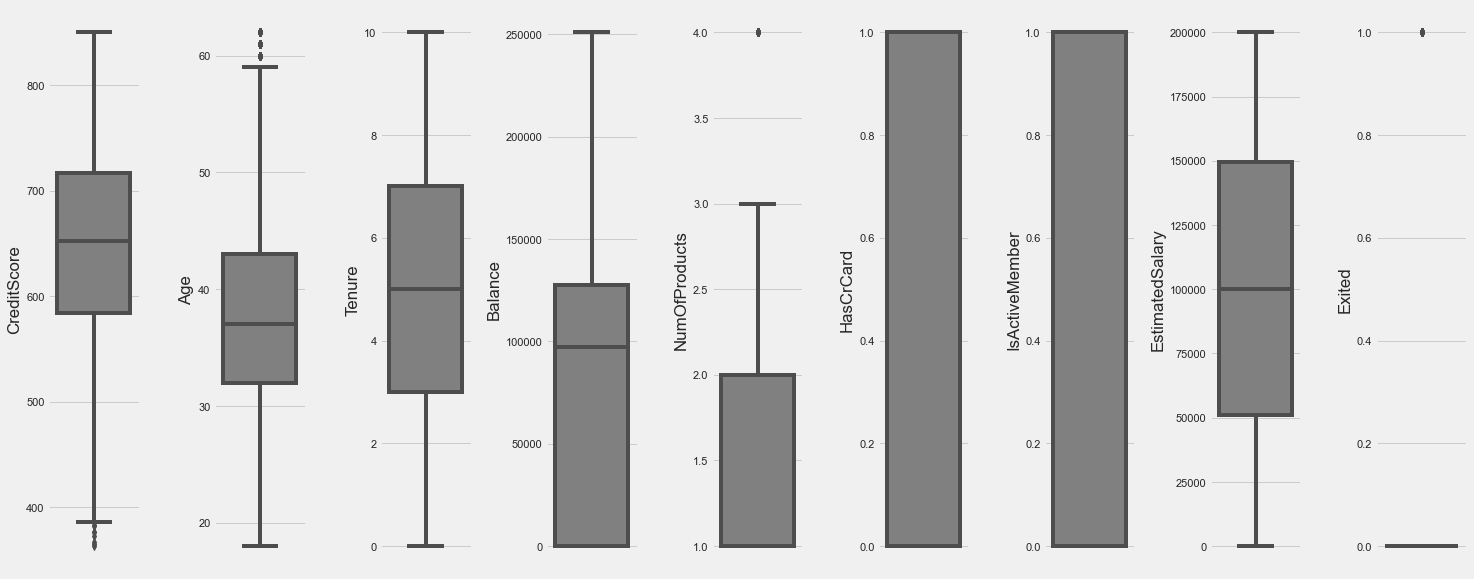

In [22]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df_new[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom 'Age' dan 'NumOfProducts'
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Age` dan `NumOfProducts`

<h2>Dist Plot</h2>

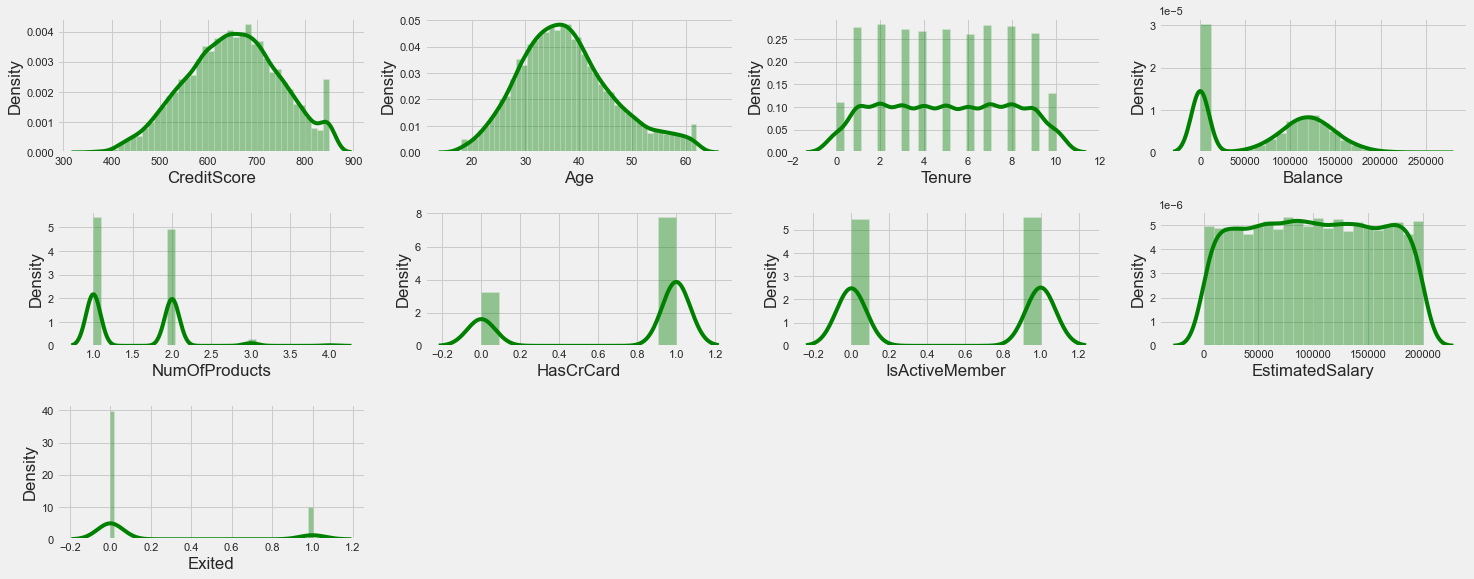

In [23]:
for i in range(0, len(nums)):
    plt.subplot(3, 4, i + 1)
    sns.distplot(df[nums[i]], color = 'green')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `Age` sedikit *skewed*
* Kolom Age memiliki sedikit outlier, berdasarkan box plot, Kolom Age memiliki 3 outliers
* Kolom NumOfProducts memiliki 1 outliers
* Selain kolom2 itu distribusinya terlihat normal-normal saja

<h2>Multivariate Analysis</h2>

<h2>Heatmap Correlation (Belum dihapus fitur yang redundant)</h2>

<AxesSubplot:>

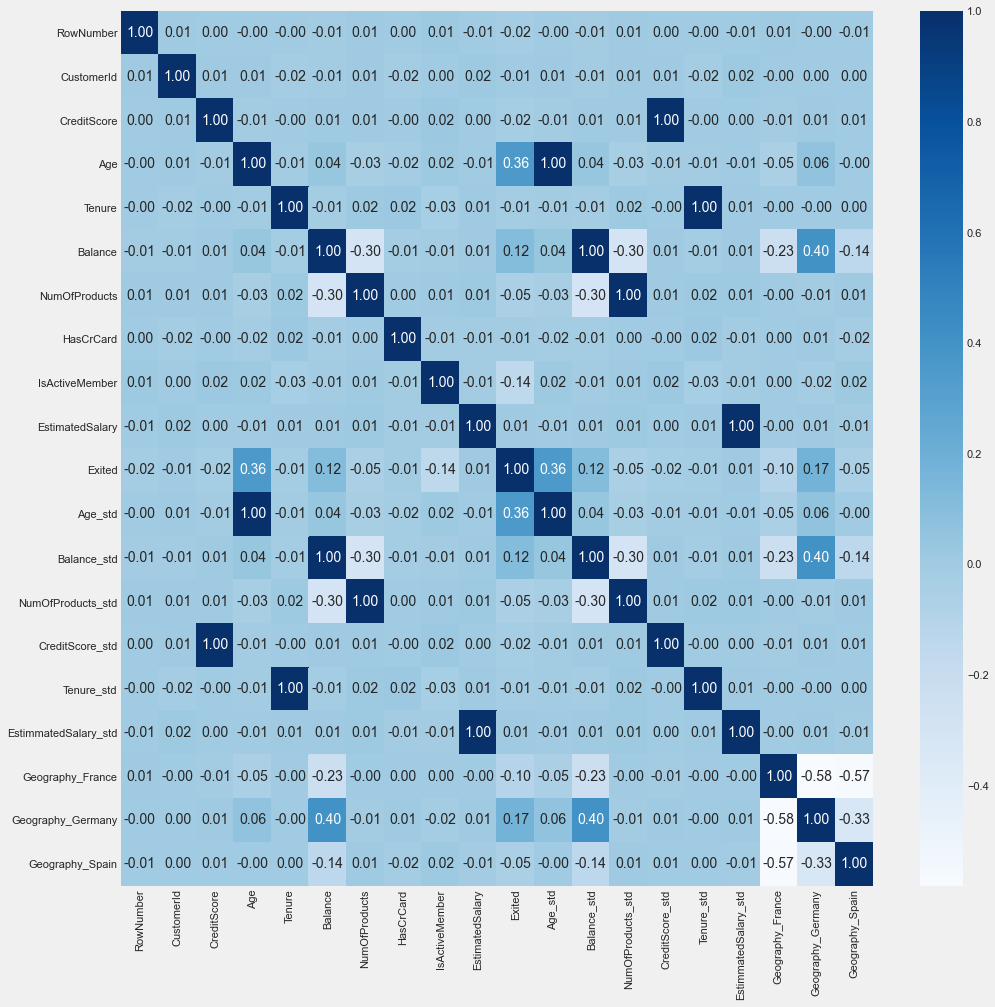

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

Untuk Heatmap, hal utama yang perlu diperhatikan adalah korelasi antar fitur:
* Fitur Age dan Exited memiliki korelasi. Jika Age semakin tinggi, Exited juga semakin tinggi
* Fitur Balance dan Exited memiliki korelasi positif.
* Fitur Geography_Germany memiliki korelasi dengan fitur Balance
* Fitur EstimatedSalary dan EstimatedSalary_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja
* Fitur Age dan Age_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja
* Fitur Balance dan Balance_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja
* Fitur NumOfProducts dan NumOfProducts_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja
* Fitur CreditScore dan CreditScore_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja
* Fitur Tenure dan Tenure_std memiliki korelasi positif yang kuat. Ada kemungkinan kedua feature ini redundan. Pilih salah satu saja

<h2>Heatmap Correlation</h2>

In [25]:
#hapus yang redundant
df_new = df.drop(columns=['Age', 'Balance', 'NumOfProducts', 'CreditScore', 'Tenure', 'EstimatedSalary'])

<AxesSubplot:>

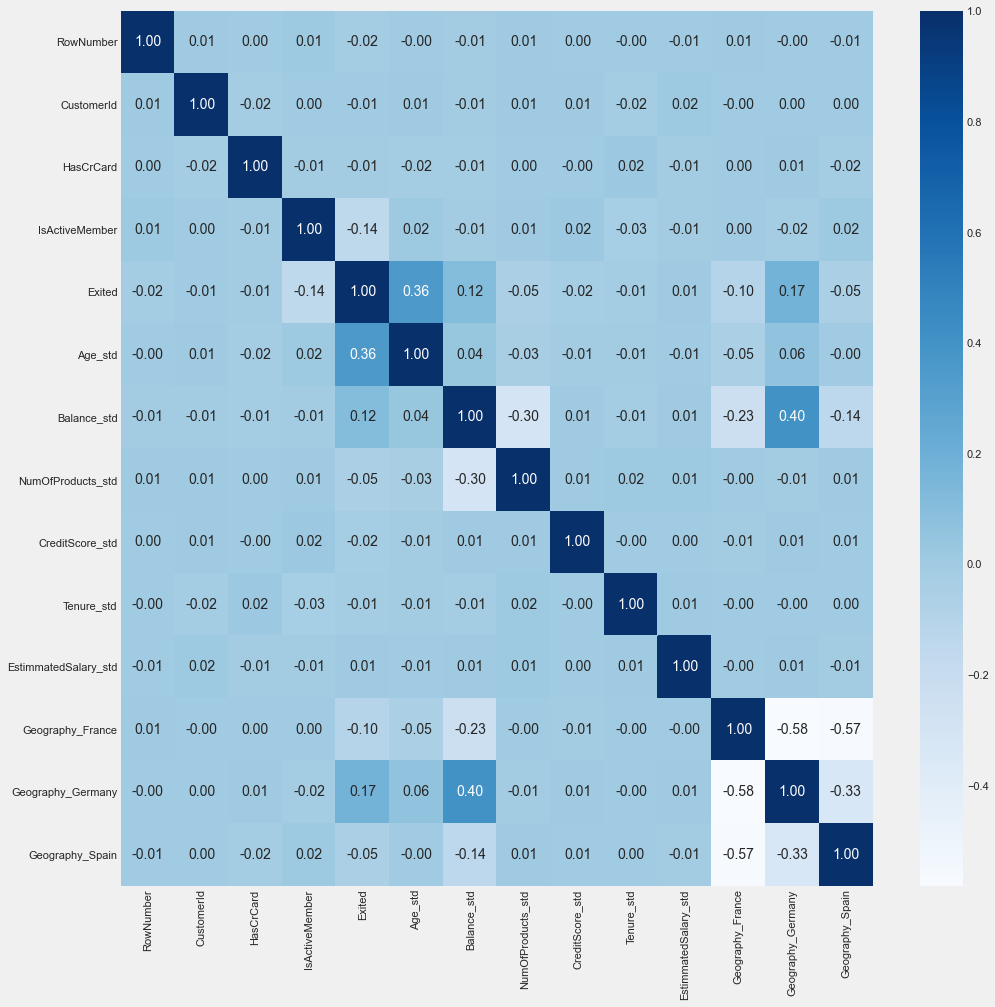

In [26]:
plt.figure(figsize = (15,15))
sns.heatmap(df_new.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

<h2>Pair plot</h2>

<Figure size 1080x1080 with 0 Axes>

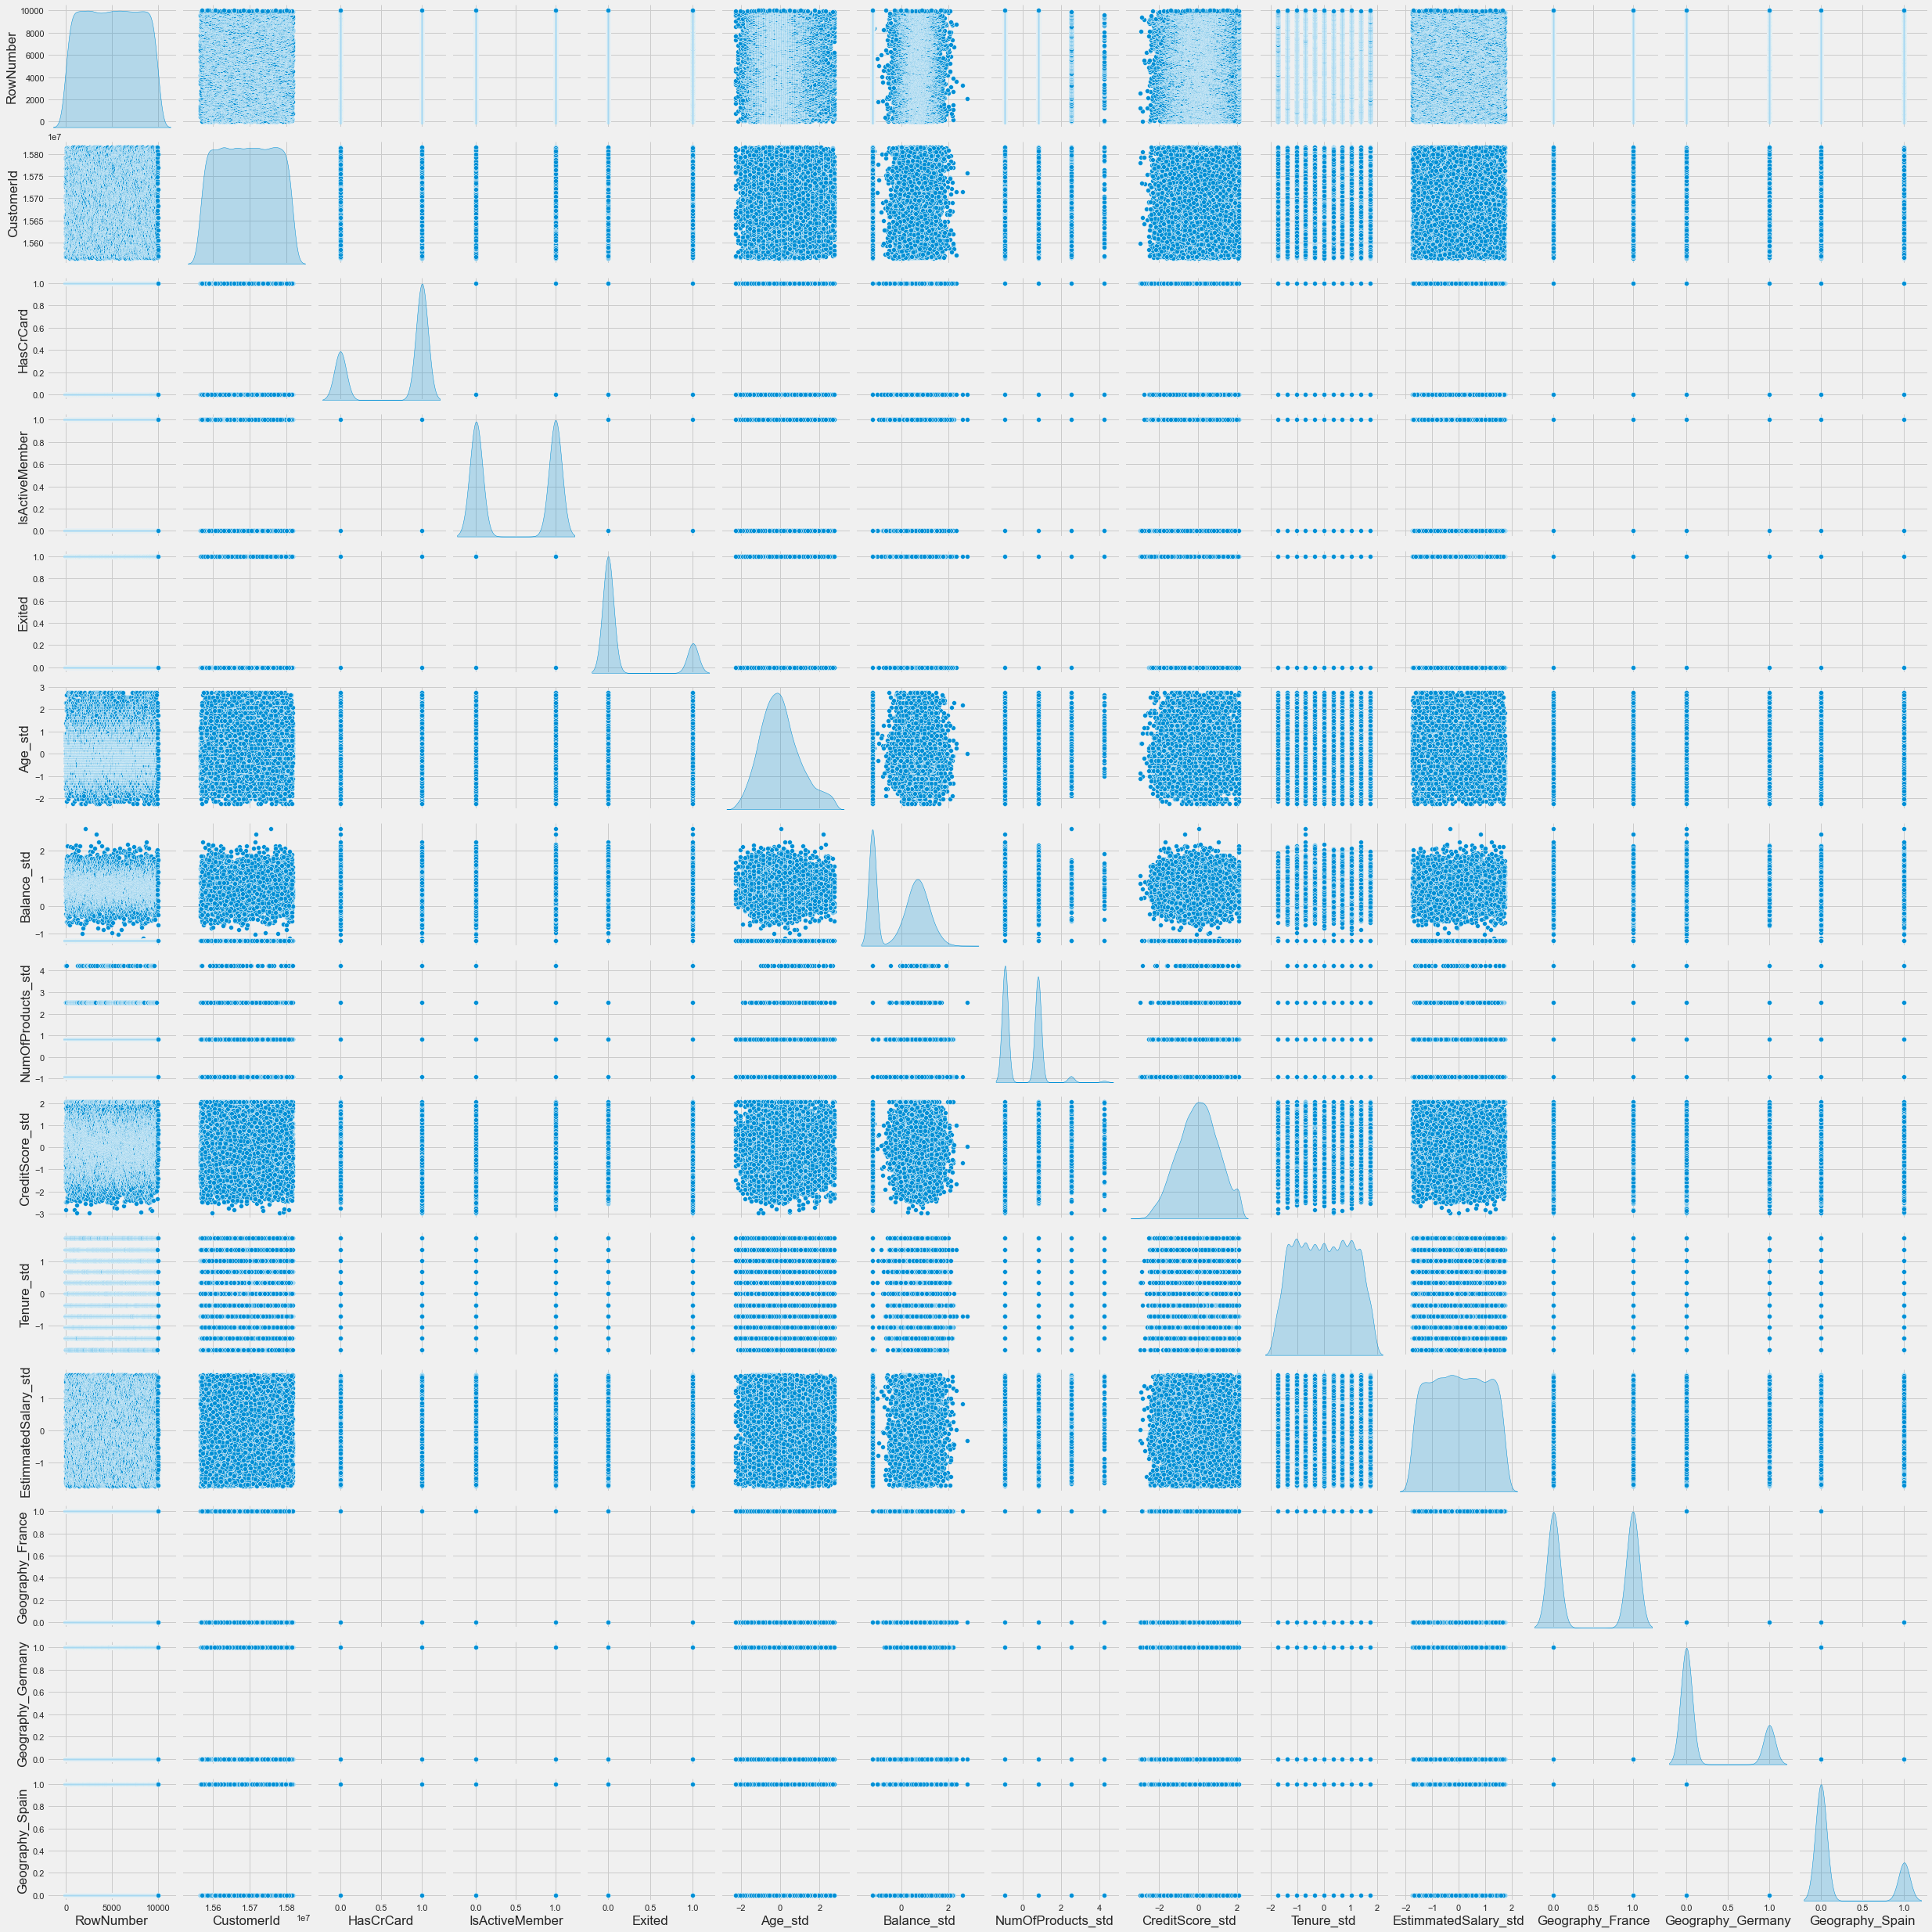

In [27]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_new, diag_kind = 'kde')

<h2>Insight</h2>

* Fitur Age dan Exited memiliki korelasi. Bisa saja Age semakin tinggi, Exited juga semakin tinggi
* Fitur Balance dan Exited memiliki korelasi positif.
* Fitur Geography_Germany memiliki korelasi positif kuat dengan fitur Balance_std

<h2>Pair Plot</h2>

<Figure size 1080x1080 with 0 Axes>

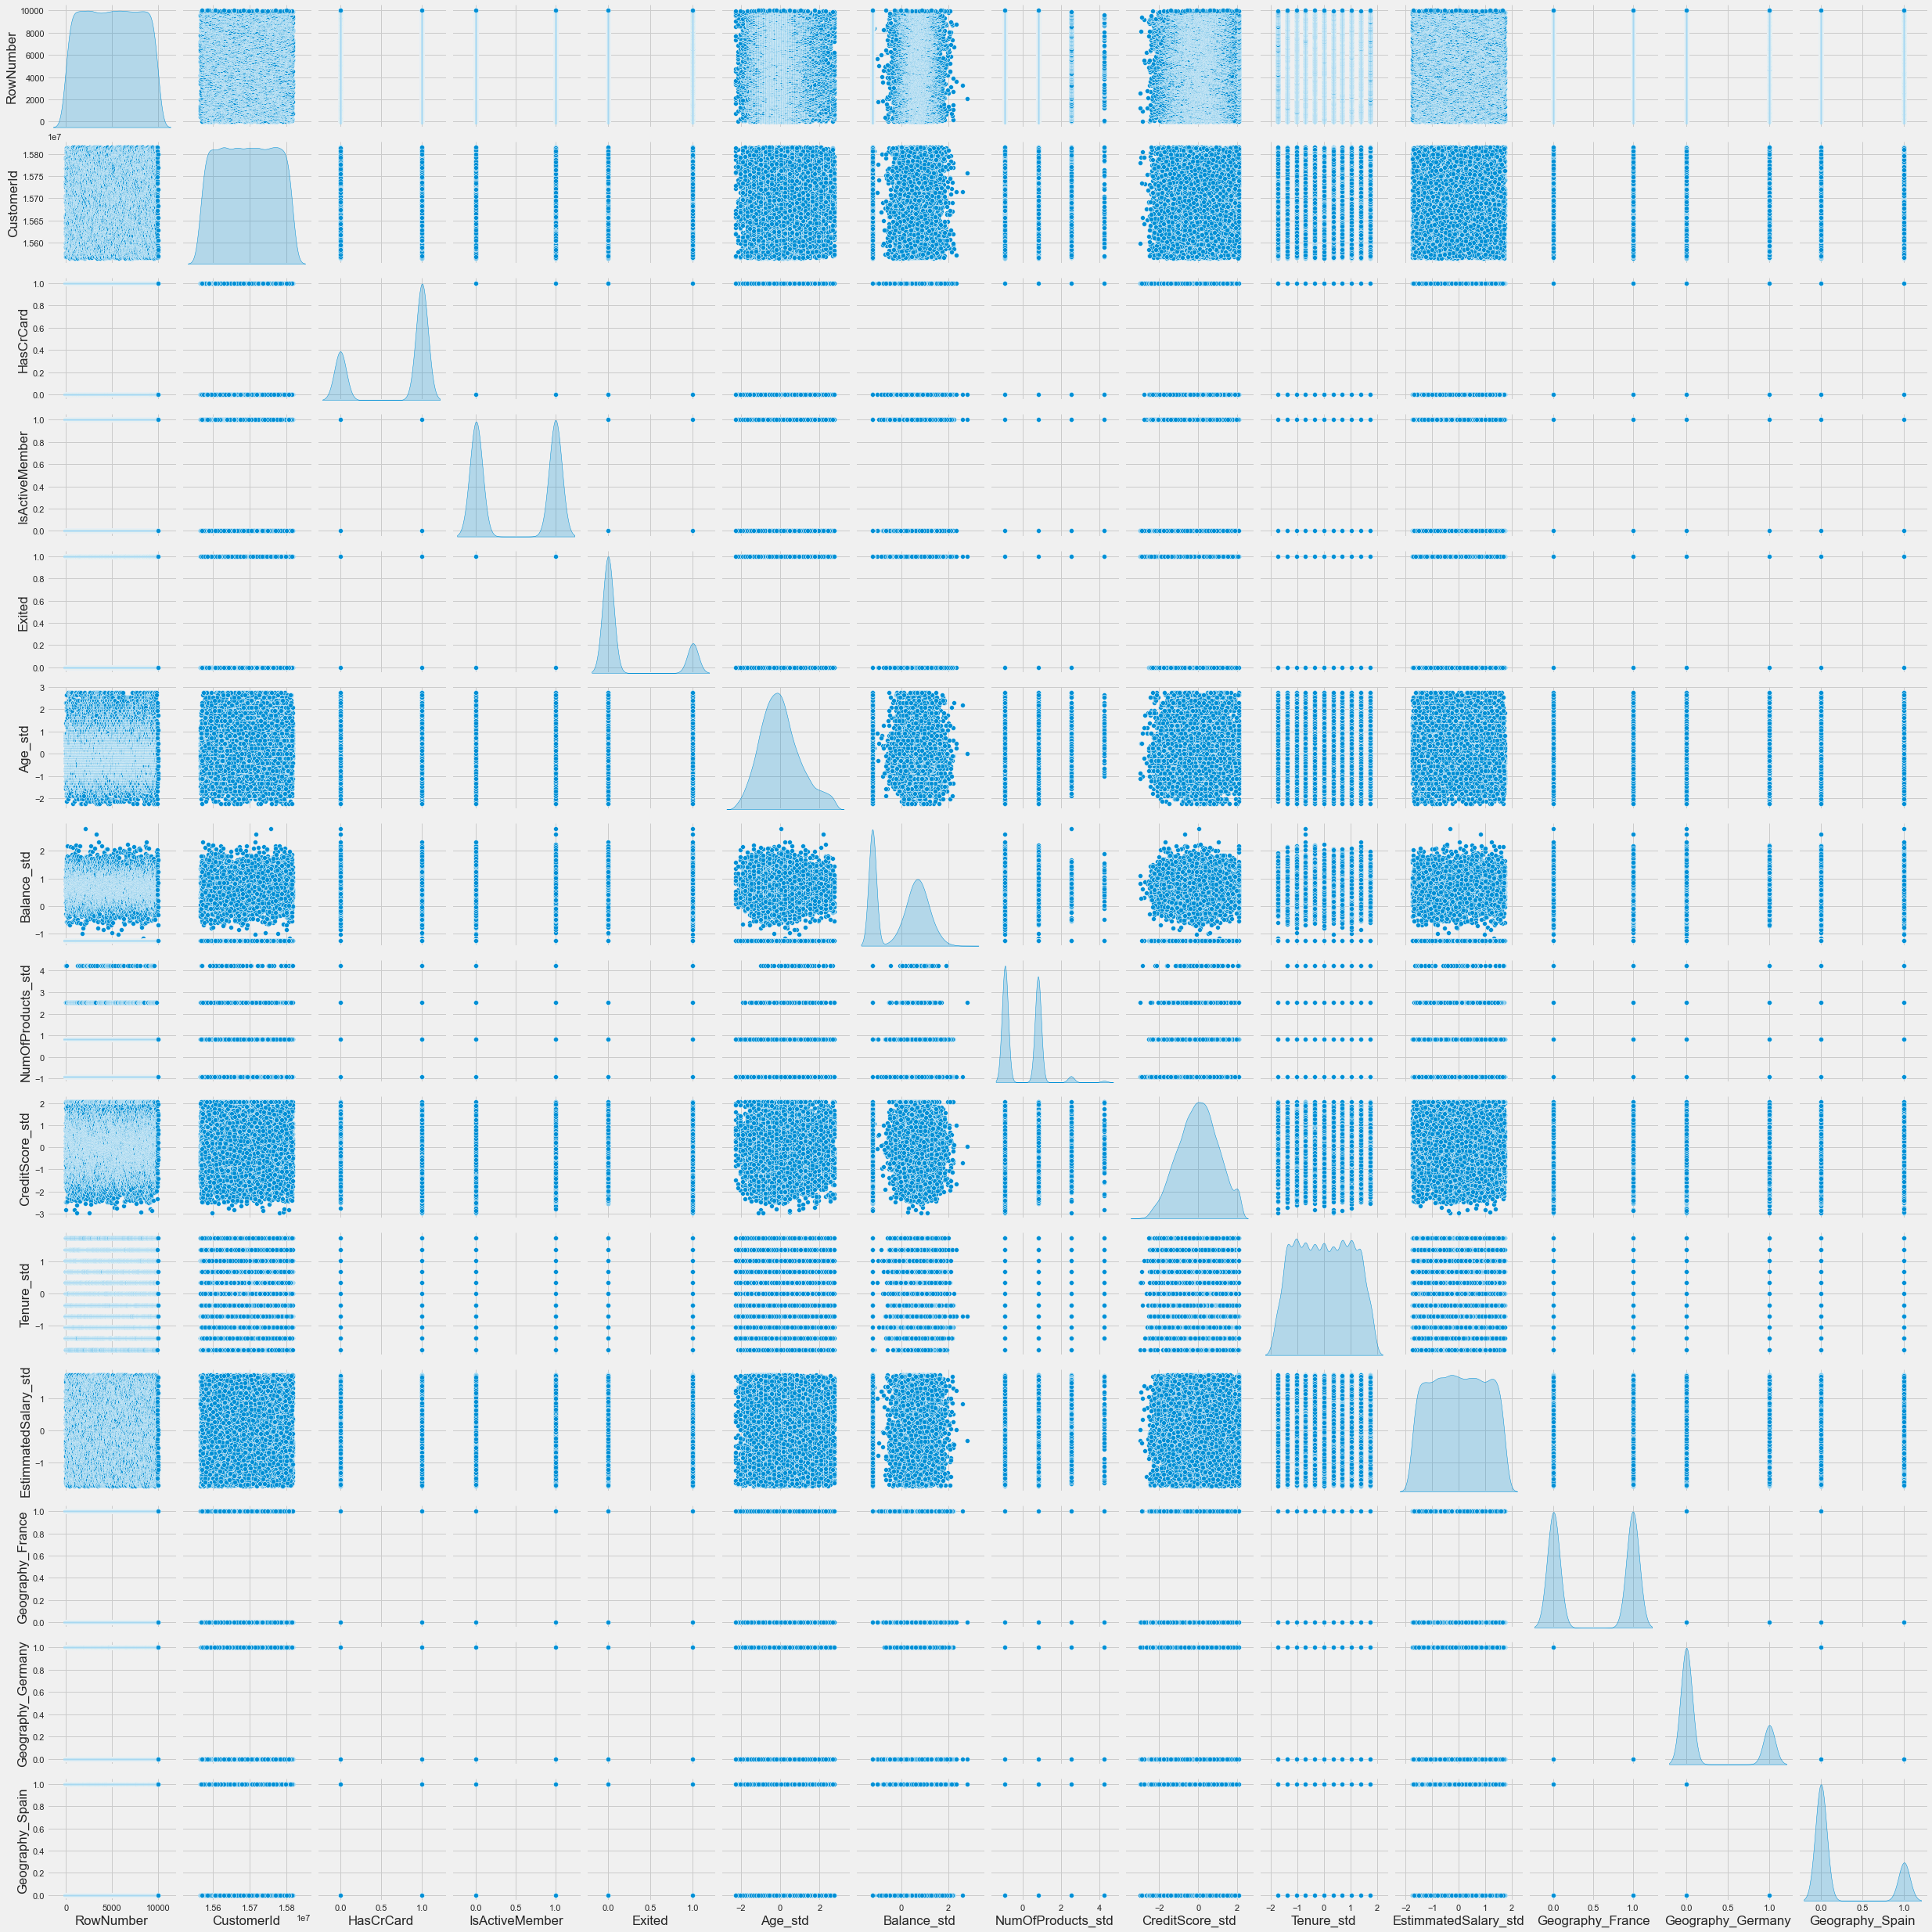

In [28]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_new, diag_kind='kde')

<h2>Imbalance Class</h2>

In [29]:
df_new['Exited_Class'] = df['Exited'] > 0
df_new['Exited_Class'].value_counts()

False    7677
True     1956
Name: Exited_Class, dtype: int64

In [30]:
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['Exited', 'Exited_Class']]]
y = df_new['Exited_Class'].values
print(X.shape)
print(y.shape)

(9633, 13)
(9633,)


In [31]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [32]:
print('Original')
print(pd.Series(y).value_counts())
print('')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    7677
True     1956
dtype: int64

UNDERSAMPLING
False    3912
True     1956
dtype: int64

OVERSAMPLING
False    7677
True     3838
dtype: int64

SMOTE
False    7677
True     3838
dtype: int64


<h2>Split Train Test Data</h2>

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [38]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [39]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [40]:
#Split Feature and Label/target
X = df_new[['HasCrCard', 'IsActiveMember', 'Age_std', 'Balance_std', 'NumOfProducts_std', 'CreditScore_std', 'Tenure_std', 'EstimmatedSalary_std', 'Geography_France', 'Geography_Germany', 'Geography_Spain']]
y = df_new[['Exited']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h2>Logisitic Reggression</h2>

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet','none']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga','none']
class_weight = [{0: 1, 1: 1},
                {0: 1, 1: 2}, 
                {0: 1, 1: 3},
                {0: 1, 1: 4},
                'none']
hyperparameters = dict(penalty=penalty, C=C,class_weight=class_weight,solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.73
Recall (Test Set): 0.27
F1-Score (Test Set): 0.39
AUC: 0.80


<b>Prediction Result in Dataset<b>

In [36]:
#y_pred = model.predict(X_test)
#y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
#y_pred_proba = model.predict_proba(X_test)
#y_pred_proba

array([[0.33168586, 0.66831414],
       [0.9178379 , 0.0821621 ],
       [0.95978357, 0.04021643],
       ...,
       [0.87131293, 0.12868707],
       [0.89438704, 0.10561296],
       [0.95214088, 0.04785912]])

In [38]:
#y_pred_train = model.predict(X_train)
#y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<b>Evaluation<b>

In [39]:
from sklearn.metrics import roc_auc_score #ini gapake predict_proba
roc_auc_score(y_test, y_pred)

0.6208976986961392

In [40]:
eval_classification(model, X_train, y_train, X_test, y_test) #ini auc nya udah pake predict proba

Accuracy (Test Set): 0.83
Precision (Test Set): 0.73
Recall (Test Set): 0.27
F1-Score (Test Set): 0.39
AUC: 0.80


In [41]:
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train)) 
#agak underfit karena Recall (Train Set) lebih kecil daripada Recall (Test Set)

Precision (Train Set): 0.26


In [42]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8248554056058134
Test score:0.8280276816608997


<h2>KNN</h2>

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = knn.predict(X_test)
eval_classification(knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.70
Recall (Test Set): 0.42
F1-Score (Test Set): 0.53
AUC: 0.78


In [44]:
y_pred_train = knn.predict(X_train)
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
#agak overfit karena Recall (Train Set) lebih besar daripada Recall (Test Set)

Recall (Train Set): 0.55


In [45]:
print('Train score: ' + str(knn.score(X_train, y_train))) #accuracy
print('Test score:' + str(knn.score(X_test, y_test))) #accuracy

Train score: 0.8807652380246181
Test score:0.842560553633218


<h2>Decision Tree</h2>

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_classification(dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.49
Recall (Test Set): 0.48
F1-Score (Test Set): 0.48
AUC: 0.67


In [47]:
y_pred_train = dt.predict(X_train)
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
#overfit karena Recall (Train Set) lebih besar daripada Recall (Test Set)

Recall (Train Set): 1.00


In [48]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7875432525951557


<h2>Random Forest</h2>

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.79
Recall (Test Set): 0.45
F1-Score (Test Set): 0.57
AUC: 0.85


In [51]:
y_pred_train = rf.predict(X_train)
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Recall (Train Set): 1.00


In [53]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.860553633217993
